In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
# Cargar el conjunto de datos "Digits"
digits = datasets.load_digits()
X, y = digits.data, digits.target


In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear y entrenar el modelo SVM
model = SVC()
model.fit(X_train, y_train)


SVC()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')



Precisión del modelo: 0.99


In [ ]:
# Ahora usaremos otro modelo completamente aparte para probarlo con imagenes escritas a mano

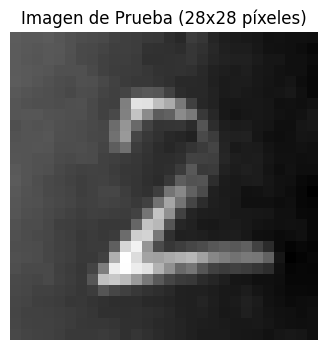

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2562 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1152 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0782 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0579 - accuracy: 0.9825
Epoch 5/5
1/1 [==============================] - 0s 52ms/step
La imagen se clasifica como el dígito: 2


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt

# Redefinir el tamaño de las imágenes a 28x28 píxeles (el formato esperado por el modelo simple)
new_size = (28, 28)

# Ruta de la imagen de prueba (modifica esta ruta según la ubicación de tu imagen)
imagen_prueba = 'num2.jpeg'

# Cargar la imagen de prueba y redimensionarla a 28x28 píxeles
img = io.imread(imagen_prueba, as_gray=True)
img = resize(img, new_size, anti_aliasing=True, mode='reflect')

# Mostrar la imagen de prueba (28x28 píxeles)
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Imagen de Prueba (28x28 píxeles)")
plt.axis('off')
plt.show()

# Aplanar la imagen para que coincida con el formato de entrada del modelo (28x28)
img_flatten = img.flatten().reshape(1, 28, 28)

# Crear un modelo simple para la clasificación de dígitos
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 clases para los dígitos del 0 al 9
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con el conjunto de datos MNIST
mnist = keras.datasets.mnist
(digits_train, digits_train_labels), (digits_test, digits_test_labels) = mnist.load_data()
digits_train = digits_train / 255.0
model.fit(digits_train, digits_train_labels, epochs=5)

# Realizar la predicción con el modelo simple
predicted_class = model.predict(img_flatten)

# Obtener la clase predicha
predicted_class = np.argmax(predicted_class)

print(f'La imagen se clasifica como el dígito: {predicted_class}')


# VGG19


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Redefinir el tamaño de las imágenes a 64x64 píxeles
new_size = (64, 64)

# Crear un generador de datos de imágenes
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2  # Añadir un rango de zoom
)

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Redefinir el tamaño de las imágenes en el conjunto de prueba
x_test = tf.image.resize(x_test, new_size)

# Normalizar las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Redefinir el tamaño de las imágenes en el conjunto de entrenamiento
x_train = tf.image.resize(x_train, new_size)

# Crear un generador de entrenamiento
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Cargar el modelo VGG19 preentrenado en ImageNet sin la capa superior
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=(64, 64, 3)))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Agregar una nueva capa de clasificación
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)  # Aumentar el número de unidades a 512
predictions = Dense(10, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo usando el generador de entrenamiento
model.fit(train_generator, validation_data=(x_test / 255.0, y_test), epochs=10)

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test / 255.0, y_test)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')


Epoch 1/10
 100/1563 [>.............................] - ETA: 42:25 - loss: 1.9081 - accuracy: 0.3291

KeyboardInterrupt: ignored